<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
Lecture 8
#### ODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's method to solve differential equations
- Use Euler to find y(t) if dy(t)/dt=f(t,y)=3$t^2$

Question: Define the function, f(t,y) = dy/dt = 3$t^2$

In [2]:
#write code here

Solutions (hidden) below:

In [3]:
#@title
#define the function
def f(t):
  dydt = 3*t**2
  return dydt


Question: Implement the Eulor method

In [4]:
#write code here

In [5]:
#@title
#implement Euler
def Euler(y0,delta, f):
  start = 0
  stop = 10
  num = (stop - start)/delta
  num = np.int(np.floor(num))
  #print('num steps',num)
  times = np.linspace(0,10,num)
  h = times[1] - times[0]
  yn = y0
  y_t = []
  for t in times:
    y_n1 = yn + h*f(t)
    yn = y_n1
    y_t.append(y_n1)
  return times, y_t


Compare Euler with the analytical integral on interval [0,10] for various step sizes. 

In [ ]:
#@title
# Compare analytical integral with the numerical estimate
y0 = 0
delta = 0.5
times, y_t = Euler(y0,delta, f)

plt.scatter(times,y_t, c='blue',alpha=0.5,marker='.')
yanalytic = [t**3 for t in times]
plt.plot(times,yanalytic,c='red',alpha=0.5)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

Question: Plot error versus step size

In [7]:
# write your code here



## Python Module for solving ODE

Runge-Kutta implemented in scipy.integrate.ode and scipy.integrate.RK45

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Consider the below example using scipy.integrate.odeint to solve a differential equation

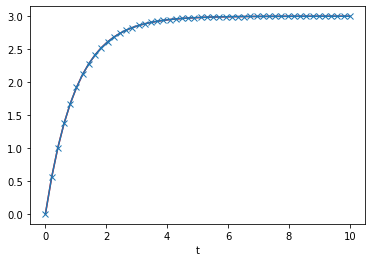

In [16]:
# define function describing the differential equation
def f(z,t):
  x = z[0]
  y = z[1]
  dxdt = 3.0 * np.exp(-t)
  dydt = 3.0 - y
  return [dxdt, dydt]

# initial conditions
z0=[0,0]

# time points
t = np.linspace(0,10)

# solve ODE
z = odeint(f, z0, t)
 
x=z[:,0]
y=z[:,1]

plt.plot(t,x,c='red')
plt.plot(t,y,marker='x')
plt.xlabel('t')
plt.show()

----------
## Planetary motion

------------

You are a SpaceX engineer. In order to plan your trip to Mars you must first study the Earth's orbit.

QUESTION: Your mission is to use Runge-Kutta implemented in Scipy to solve the differential equations for earth's orbital motion.

In [10]:
#enter code here



Solution (hidden) below:

In [11]:
#@title
from scipy.integrate import ode
from scipy.integrate import RK45
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#@title
# create derivatives function

def func(t, z):
  gm = 1.327E11
  y = z
  val = (y[0]*y[0] + y[2]*y[2])**-1.5
  A = gm*val*-1
  dydt = np.zeros((4,))
  dydt[0] = y[1]
  dydt[1] = y[0] #-1*gm*val
  dydt[1] = dydt[1]*A
  dydt[2] = y[3]
  dydt[3] = y[2] #-1*gm*val
  dydt[3] = dydt[3]*A 
  return dydt

# initial conditions
z0_x = 147.1E6
z0_vx = 0
z0_y = 0
z0_vy = 30.3
z0=[z0_x,z0_vx,z0_y,z0_vy]

# setup solver
t0 = 0
t_bound = 100000000
rtol=0.01
maxsteps= 10000 #np.inf
solver = RK45(func, t0, z0, t_bound, max_step=maxsteps,rtol=rtol)


In [13]:
#@title
t_ = []
y_ = []
for i in np.arange(2000):
  solver.step()
  t_.append(solver.t)
  y_.append(solver.y)

# collect results
y_0 = [y[0] for y in y_]
y_1 = [y[1] for y in y_]
y_2 = [y[2] for y in y_]
y_3 = [y[3] for y in y_]


In [ ]:
#@title
# plot orbit
plt.axes().set_aspect('equal', 'datalim')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.scatter(y_0, y_2, marker='.', color='green')
plt.scatter(0,0,marker='o',color='yellow')
plt.ylabel("Y [km]")
plt.xlabel("X [km]")
plt.show()

## BONUS question
- Animate the plot of the Earth's motion around the sun

In [14]:
#write code here

